## Project: Credit Card Fraud Detection

## Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline



In [3]:
data = pd.read_csv("D:\credit card fraud data\creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Cheking the dimention of the Data Shape

In [5]:
data.shape

(284807, 31)

## Plotting data for Data Visualization

Text(0, 0.5, 'Frequency')

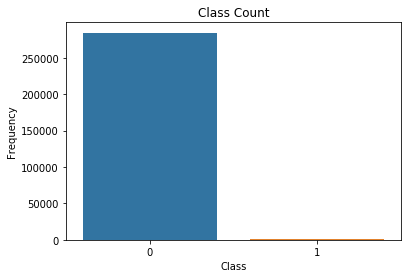

In [6]:
data_count_class=data
class_count = pd.value_counts(data['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=data_count_class)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

1. This is a class imbalance problem
2. The non-fraud /normal transactions are more than 2500000+ but the fraud transactions are very less approx 400+. 

In [7]:
fraud_data = data[data_count_class.Class == 1]
normal_data = data[data_count_class.Class == 0]

In [8]:
fraud_data.shape

(492, 31)

In [9]:
normal_data.shape

(284315, 31)

Text(0, 0.5, 'Frequency')

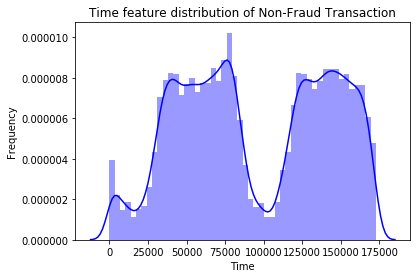

In [10]:
sns.distplot(normal_data.Time, color='b')
plt.title("Time feature distribution of Non-Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

It clearly shows the distribution of Time over Non-Fraud Transactions.

Text(0, 0.5, 'Frequency')

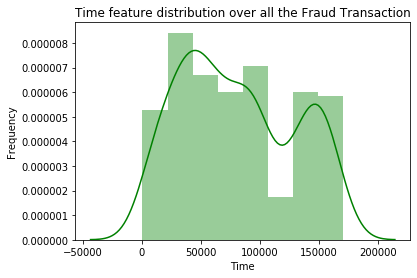

In [11]:
sns.distplot(fraud_data.Time, color='g')
plt.title("Time feature distribution over all the Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

It shows the distribution of Time over all the Fraud Transactions.

Text(0, 0.5, 'Frequency')

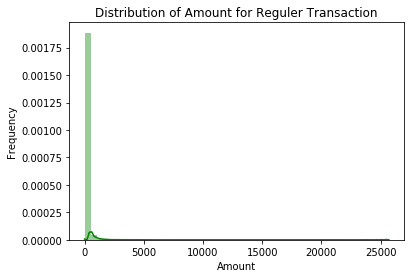

In [12]:
sns.distplot(normal_data.Amount, color='g')
plt.title("Distribution of Amount for Reguler Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

it is the distribution of Amount over reguler Transactions,we see one peak at the beginning but it becomes flat. The distribution range is 0 to 5000 in max cases.

Text(0, 0.5, 'Dist Frequency')

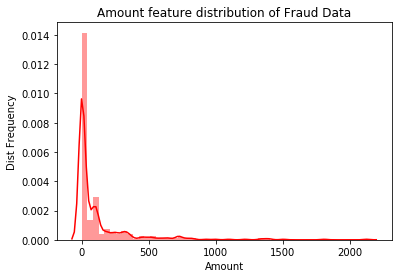

In [13]:
sns.distplot(fraud_data.Amount, color='r')
plt.title("Amount feature distribution of Fraud Data")
plt.xlabel("Amount")
plt.ylabel("Dist Frequency")

### This graph shows the distribution of Amount for all Fraud Transactions,there is a huge peak ,but it becomes flat after 900. 

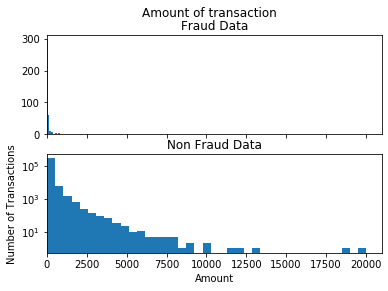

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount of transaction')
bins = 50

ax1.hist(fraud_data.Amount, bins = bins)
ax1.set_title('Fraud Data')

ax2.hist(normal_data.Amount, bins = bins)
ax2.set_title('Non Fraud Data')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 21000))
plt.yscale('log')
plt.show()

We can see that no of Normal/Regular Transaction has very high count as most reguler transaction with a regurel pattern of amount.
Fraud Transactions occures not reguler and count also very less.

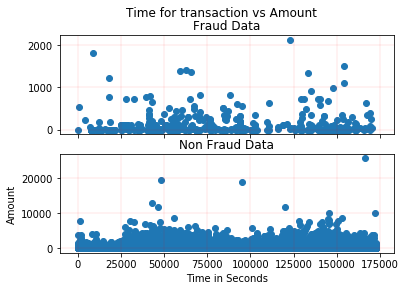

In [15]:
f, (ax, ax_1) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time for transaction vs Amount')

ax.scatter(fraud_data.Time, fraud_data.Amount)
ax.set_title('Fraud Data')
ax.grid(color='r', linestyle='-', linewidth=0.1)


ax_1.scatter(normal_data.Time, normal_data.Amount)
ax_1.set_title('Non Fraud Data')
ax_1.grid(color='r', linestyle='-', linewidth=0.1)
plt.xlabel('Time in Seconds')
plt.ylabel('Amount')
plt.show()

# Scaling of Data Set

We need to Scale the Amount as it is in different Scale

In [16]:
from sklearn.preprocessing import StandardScaler
model_data = data.drop(['Time'], axis=1)
model_data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
model_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Lets do train & test split of the data into different Class , 0 or 1

In [17]:
model_train = model_data.drop("Class", 1).values
model_train.shape

(284807, 29)

In [18]:
model_test = model_data["Class"].values
model_test.shape

(284807,)

## Here we have the Unbalanced Data, so we need to apply Sampling 

We are tring the sampling technique SMOTE here, lets see how it will be effective sampling technique .

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
sampling_train=model_train
sampling_test=model_test
sampler = SMOTE(random_state = 0, n_jobs = -1)
model_train_lr , model_test_lr = sampler.fit_sample(sampling_train, sampling_test)

In [21]:
model_train_lr.shape

(568630, 29)

In [22]:
model_test_lr.shape

(568630,)

## Now we have the sampling balanced data approx 568K+ , Need to Split the data into training and testing part Now

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(model_train_lr, model_test_lr, test_size = 0.25, random_state = 0)



In [24]:
X_train.shape

(426472, 29)

In [25]:
X_test.shape

(142158, 29)

We have a train and test split ready now

# Now we have a proper set of Train and Test data split ,let build the model  
# Building Model: Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=300, random_state=0, n_jobs = -1)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=300, n_jobs=-1, random_state=0)

In [27]:
lr_prediction = lr.predict(X_test)
print(lr_prediction)

[1 0 1 ... 1 0 1]


In [28]:
lr_prediction.shape

(142158,)

## We have the first LogisticRegression Model ready , Lets check the model accuracy parameters

In [29]:
from matplotlib import pyplot
import seaborn as sns

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,recall_score

sc_lr_accuracy = accuracy_score(Y_test, lr_prediction)
sc_lr_recall = recall_score(Y_test, lr_prediction)
sc_lr_cm = confusion_matrix(Y_test, lr_prediction)
sc_lr_auc = roc_auc_score(Y_test, lr_prediction)

print("Model has a Score_Accuracy: {:.3%}".format(sc_lr_accuracy))
print("Model has a Score_Recall: {:.3%}".format(sc_lr_recall))
print("Model has a Score ROC AUC: {:.3%}".format(sc_lr_auc))


Model has a Score_Accuracy: 94.481%
Model has a Score_Recall: 91.511%
Model has a Score ROC AUC: 94.490%


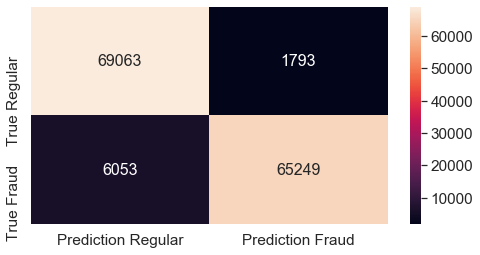

In [30]:
sc_lr_cm = pd.DataFrame(sc_lr_cm, ['True Regular','True Fraud'],['Prediction Regular','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(sc_lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

In [31]:
print(sc_lr_cm)

              Prediction Regular  Prediction Fraud
True Regular               69063              1793
True Fraud                  6053             65249


## Lets try another Sampling and see if the model accuracy improve or not

In [32]:
from imblearn.combine import SMOTETomek

In [33]:
sampling_train=model_train
sampling_test=model_test
SMOTEtomek_sampler = SMOTETomek(random_state = 0, n_jobs = -1)
model_input_rf , model_output_rf = SMOTEtomek_sampler.fit_sample(sampling_train, sampling_test)

In [34]:
model_input_rf.shape

(568630, 29)

## Now we have 568k+ sample data which need to split in train and test

# Now we will try the Shuffle Splitting, which will shuffle all sampled data and split

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_splits = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=0)

In [36]:
for train, test in shuffle_splits.split(model_input_rf, model_output_rf):
    X_train, X_test = model_input_rf[train], model_input_rf[test]
    Y_train, Y_test = model_output_rf[train], model_output_rf[test]

In [37]:
X_train.shape

(426472, 29)

In [38]:
Y_train.shape

(426472,)

# We have the data for Second Model Random Forest ready , Lets build and check the model accuracy parameters


# Random Forest 

# We will import it from sklearn.ensemble

In [39]:
from sklearn.ensemble import RandomForestClassifier



In [40]:
RandomForest_model = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
RandomForest_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=0)

In [41]:
RandomForest_predict = RandomForest_model.predict(X_test)

In [42]:
print(RandomForest_predict)

[0 1 1 ... 0 1 1]


# Lets check the Accuracy Parameters and different scores

In [43]:
sc_rf_accuracy = accuracy_score(Y_test, RandomForest_predict)
sc_rf_recall = recall_score(Y_test, RandomForest_predict)
sc_rf_cm = confusion_matrix(Y_test, RandomForest_predict)
sc_rf_auc = roc_auc_score(Y_test, RandomForest_predict)

print("Model has a Score Accuracy: {:.3%}".format(sc_rf_accuracy))
print("Model has a Score Recall: {:.3%}".format(sc_rf_recall))
print("Model has a Score ROC AUC: {:.3%}".format(sc_rf_auc))

Model has a Score Accuracy: 99.987%
Model has a Score Recall: 100.000%
Model has a Score ROC AUC: 99.987%


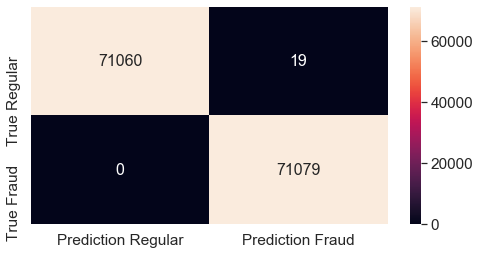

In [44]:
sc_rf_cm = pd.DataFrame(sc_rf_cm, ['True Regular','True Fraud'],['Prediction Regular','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(sc_rf_cm, annot=True,annot_kws={"size": 16},fmt='g')

## Now we see from the confusion metrix the True Prediction and False Prediction rate are very high

# Lets try another Sampling for the Unbalanced Data and build a Kmean model

In [45]:
from imblearn.under_sampling import TomekLinks


In [46]:
TomekLinks_sampler = TomekLinks()
model_input_km , model_output_km = SMOTEtomek_sampler.fit_sample(model_train, model_test)

# Lets find the optimul Cluster-Number for the Kmean 

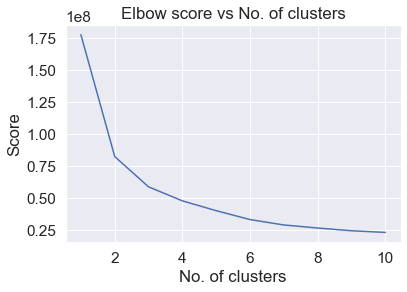

In [47]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 200, random_state = 0, n_jobs = -1)
    kmeans.fit(model_input_km)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow score vs No. of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('Score')
plt.show()

# Now we see at the two-cluster number the Kmean has a elbow curve , so we will use two cluster Number

# Lets build the Unsupervised K-Means Clustering Model with cluster No=2

In [48]:
kmeans = KMeans(n_clusters = 2, max_iter = 200, random_state = 0, n_jobs = -1).fit(model_input_km)

In [49]:
k_centers = kmeans.cluster_centers_

In [50]:
from scipy import spatial
kmean_distance = pd.DataFrame(spatial.distance.cdist(model_input_km, k_centers, 'euclidean'))
kmean_distance['distance_mean'] = kmean_distance.apply(np.mean, axis=1)
kmean_distance.head()

,0,1,distance_mean
0,5.665211,38.961669,22.313440
1,4.792793,38.872886,21.832840
2,7.494235,39.347341,23.420788
3,6.191604,39.159712,22.675658
4,5.545008,38.900611,22.222809


# Lets calculate the 95 percentile of dist mean and take as cut off classifier 

In [51]:
cut_off = np.percentile(kmean_distance['distance_mean'], 95)

In [52]:
model_predict_km = np.where(kmean_distance['distance_mean'] >= cut_off, 1, 0)

# We have the Kmean Predict output data ...Lets check diffrent Scores

In [53]:
sc_km_accuracy = accuracy_score(model_output_km, model_predict_km)
sc_km_recall = recall_score(model_output_km, model_predict_km)
sc_km_cm = confusion_matrix(model_output_km, model_predict_km)
sc_km_auc = roc_auc_score(model_output_km, model_predict_km)

print("Model has a score Accuracy: {:.3%}".format(sc_km_accuracy))
print("Model has a score Recall: {:.3%}".format(sc_km_recall))
print("Model has a score ROC AUC: {:.3%}".format(sc_km_auc))

Model has a score Accuracy: 54.382%
Model has a score Recall: 9.382%
Model has a score ROC AUC: 54.382%


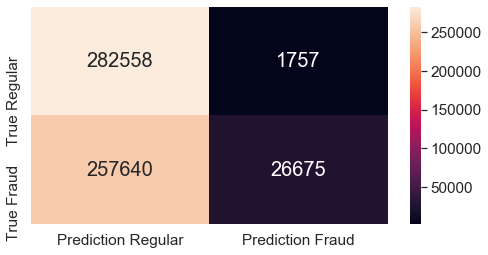

In [54]:
sc_km_cm = pd.DataFrame(sc_km_cm, ['True Regular','True Fraud'],['Prediction Regular','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(sc_km_cm, annot=True,annot_kws={"size": 20},fmt='g')

# Lets try the KnighbourClassifier also (KNN ) on our data set

# We need a suitable error metrics for this problem.

## For heavily imbalanced data lets consider "Recall" as a suitable error metric 

### Lets Apply KNN on the dataset and we will find out the best k value using 5-Folds CV.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [56]:
from sklearn.model_selection import train_test_split

X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(model_train_lr[0:100000], model_test_lr[0:100000], test_size = 0.35, random_state = 0)

In [57]:
no = list(range(0,6))

KNeighbors = list(filter(lambda x: x%2!=0, no))

CV_Sc = []

for k in KNeighbors:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
    recall_scores = cross_val_score(KNN, X_train_knn, Y_train_knn, cv = 5, scoring='recall')
    CV_Sc.append(recall_scores.mean())

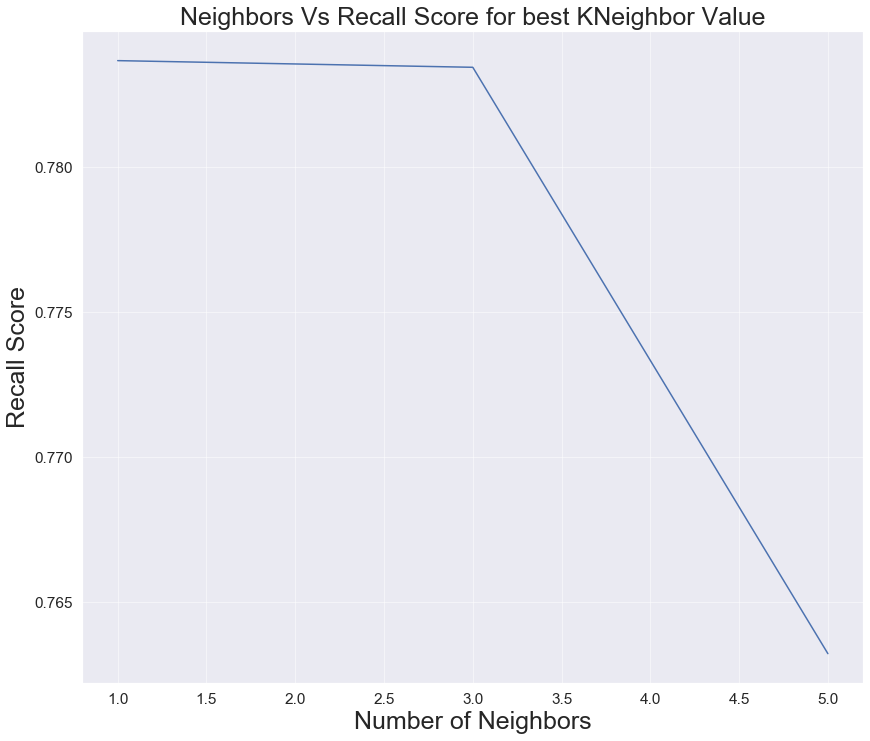

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 12))
plt.plot(KNeighbors, CV_Sc)
plt.title("Neighbors Vs Recall Score for best KNeighbor Value", fontsize=25)
plt.xlabel("Number of Neighbors", fontsize=25)
plt.ylabel("Recall Score", fontsize=25)
plt.grid(linestyle='-', linewidth=0.5)

In [59]:
best_k = KNeighbors[CV_Sc.index(max(CV_Sc))]
print("Best value of K= "+str(best_k)+" ")

Best value of K= 1 


In [60]:
from sklearn.metrics import recall_score

KNN_best_model = KNeighborsClassifier(n_neighbors = best_k, algorithm = 'kd_tree')
KNN_best_model.fit(X_train_knn, Y_train_knn)
KNN_prediction = KNN_best_model.predict(X_test_knn)

recallTest = recall_score(Y_test_knn, KNN_prediction)

print("Recall Score of the knn classifier for best k values of "+str(best_k)+" is: "+str(recallTest))

cm = confusion_matrix(Y_test_knn, KNN_prediction)

print(cm)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

Recall Score of the knn classifier for best k values of 1 is: 0.8933333333333333
[[34913    12]
 [    8    67]]


(34913, 12, 8, 67)

In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Importing packages for XGBoost, Lets try the fast and most famous Gradient Boosting Model.

In [65]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Lets cosider our sampling data set we prepared at the beginning and do Splitting Datasets into Train & Test for XGBoosting

In [66]:
X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb =train_test_split(model_train_lr, model_test_lr, stratify=model_test_lr, random_state=42)

## Finding the best No of Tree to build XGBoosting

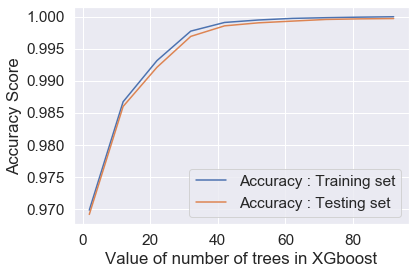

In [67]:
tree_range = range(2, 100, 10)

score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_xgb,y_train_xgb)
    score1.append(xgb.score(X_train_xgb,y_train_xgb))
    score2.append(xgb.score(X_test_xgb,y_test_xgb))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy : Training set')
plt.plot(tree_range,score2,label= 'Accuracy : Testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy Score')
plt.legend()

## Here best number of trees in XGB is 40 , we see the Training & Test Accuracy become flatten after 40 no of Trees consideration

## Lets build the model with n_estimators=40  (best No of tree to build XGB)

In [68]:
xgb=XGBClassifier(n_estimators=40)
xgb.fit(X_train_xgb,y_train_xgb)
print('Accuracy of XGB n=6 on the testing dataset is :{:.3f}'.format(xgb.score(X_test_xgb,y_test_xgb)))

Accuracy of XGB n=6 on the testing dataset is :0.998


In [69]:
xgb_predict = xgb.predict(X_test_xgb)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,recall_score



sc_xgb_accuracy = accuracy_score(y_test_xgb, xgb_predict)
sc_xgb_recall = recall_score(y_test_xgb, xgb_predict)
sc_xgb_cm = confusion_matrix(y_test_xgb, xgb_predict)
sc_xgb_auc = roc_auc_score(y_test_xgb, xgb_predict)

print("Model has a Score Accuracy: {:.3%}".format(sc_xgb_accuracy))
print("Model has a Score Recall: {:.3%}".format(sc_xgb_recall))
print("Model has a Score ROC AUC: {:.3%}".format(sc_xgb_auc))

Model has a Score Accuracy: 99.838%
Model has a Score Recall: 99.934%
Model has a Score ROC AUC: 99.838%


# We have implemented Logistic Regression, Random Forest, K-Means and KNN moleds , Now lets compare all perfomance matrix and choose the best model

In [71]:
Prediction_Accuracy={
    'Logistic Regression': sc_lr_accuracy,
    'Random Forest': sc_rf_accuracy,
    'K-Means': sc_km_accuracy,
    'XGBoost': sc_xgb_accuracy
}

Prediction_Recall={
    'Logistic Regression': sc_lr_recall,
    'Random Forest': sc_rf_recall,
    'K-Means': sc_km_recall,
    'KNN':recallTest,
    'XGBoost': sc_xgb_recall
}

Prediction_AUC={
    'Logistic Regression': sc_lr_auc,
    'Random Forest': sc_rf_auc,
    'K-Means': sc_km_auc,
    'XGBoost': sc_xgb_auc
}

Text(0.5, 0, 'Accuracy_Score')

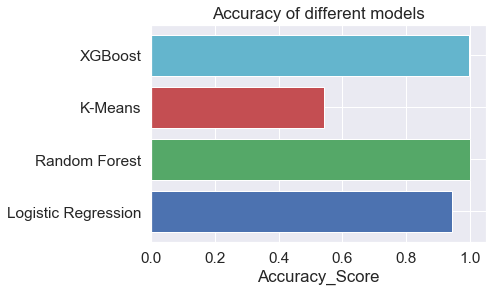

In [72]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']


pyplot.title('Accuracy of different models')
pyplot.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center',color=colors)
pyplot.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
pyplot.xlabel('Accuracy_Score')

Text(0.5, 0, 'Recall Score of different models')

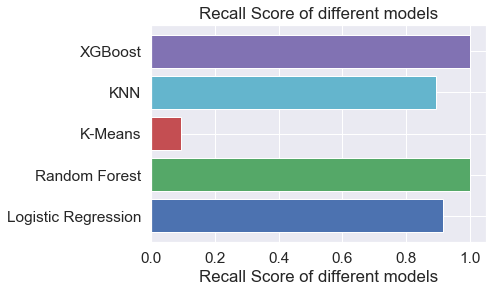

In [73]:
pyplot.title('Recall Score of different models')
pyplot.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center',color=colors)
pyplot.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
pyplot.xlabel('Recall Score of different models')

Text(0.5, 0, 'AUC Score of different models')

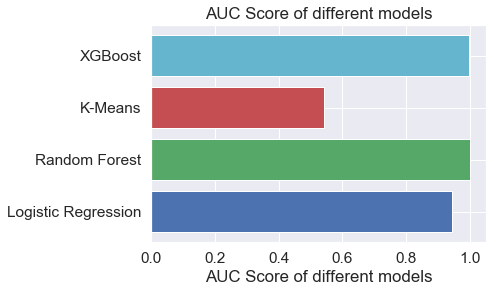

In [74]:
pyplot.title('AUC Score of different models')
pyplot.barh(range(len(Prediction_AUC)), list(Prediction_AUC.values()), align='center',color=colors)
pyplot.yticks(range(len(Prediction_AUC)), list(Prediction_AUC.keys()))
pyplot.xlabel('AUC Score of different models')

# What we implemented so far 

➢Taking the dataset, exploratory data analysis would be performed here to check how these variables contribute to the outcome, though this might be limited and much values cant’ be drawn since the variables aren’t actual and the original names of the features’ representation is hidden.
➢ Outlier detection and removal is up next, this phase seeks to find all points/observations that are irregular or abnormal relative to the dataset.
➢ Initially, the data need to check for the missing values, we would do this by either replacing them with mean / median of the variables or a variable with high percentage of missing values is removed.
➢ The relation of different features is observed in visualizations.
➢ The data distribution of the features is also checked.
➢ The data is standardized in order to achieve zero mean and equal variance.
➢ We used the Supervised Learning Method and Random Forest classifier.
➢ Then the model performance metrics are calculated.
➢ The model is checked & tuned accordingly in order to achieve high performance, Non-Overfitting, low bias features.
➢ We will used different technique to find the important features.
➢ Use them to fit the model and maintain low/reduced the complexity and increase the performance.
➢ We will next use the Unsupervised Learning Methods: K-means algorithm is fitted to the data by removing the Label feature.
➢ In the K Means, the distance between the cluster centroid and the instances are measured
➢ If the instances which are > 90-95% percentile are considered as outliers.
➢ These outliers need to compare with actual results to check the accuracy of the model.
➢ At the conclusion I will compare the performance of both the supervised and unsupervised learning methods and conclude the best fitted model for credit card fraud detection.

## Final Model Selection : Conclusion 

1.1) For a class imbalance dataset,Supervised Learning Methods clearly dominates ,compare to the Unsupervised Learning Methods 

We compared the Accuracy ,Recall ,AUC score of Logistic ,Random Forest,Kmean and KNN 

1.2) **XGBoost and Random Forest Classifier have the higher accuracy than Logistic Regresssion followed by K-Means Clustering.** 


1.3) **XGBoost and Random Forest Classifier have higher recall score > than  Logistic Regresssion followed by K-Means Clustering.** 



1.4) **XGBoost and Random Forest Classifier have higher auc score than > Logistic Regresssion followed by K-Means Clustering.** 



1.5) After all validation therefore,we would like to conclude that Supervised Learning Methods :::
     such as **XGBoost and Random Forest Classifier** gives a better prediction over Unsupervised Methods. 
     
     
     Random Forest :
1. Model has a Score Accuracy: 99.987%
2. Model has a Score Recall: 100.000%
3. Model has a Score ROC AUC: 99.987%

       XGBoost:
1. Model has a Score Accuracy: 99.838%
2. Model has a Score Recall: 99.934%
3. Model has a Score ROC AUC: 99.838%

# We concluded XGBoost and Random Forest Classifier are the best fit model

# Lets test one of the final Model : Random Forest  with some random data

In [75]:
RandomForest_predict_check = RandomForest_model.predict(model_train_lr)

In [76]:
sc_rf_accuracy_ck = accuracy_score(model_test_lr, RandomForest_predict_check)
sc_rf_recall_ck = recall_score(model_test_lr, RandomForest_predict_check)
sc_rf_cm_ck = confusion_matrix(model_test_lr, RandomForest_predict_check)
sc_rf_auc_ck = roc_auc_score(model_test_lr, RandomForest_predict_check)

print("Model has a Score Accuracy: {:.3%}".format(sc_rf_accuracy_ck))
print("Model has a Score Recall: {:.3%}".format(sc_rf_recall_ck))
print("Model has a Score ROC AUC: {:.3%}".format(sc_rf_auc_ck))

Model has a Score Accuracy: 99.997%
Model has a Score Recall: 100.000%
Model has a Score ROC AUC: 99.997%


In [77]:
print(sc_rf_cm_ck)

[[284296     19]
 [     0 284315]]


# Our proposed final model performed a test on random data set and it has Accuracy 99% Recal 100% and ROC AUC 99% , which is very high performer and accurate model to predict .